# Practice Assignment 5

## Question 1.

## Data set

In [ ]:
import numpy as np
import pandas as pd

data = {
    'Age': np.random.randint(18, 90, size=100),
    'MonthlyCharges': np.random.uniform(30, 120, size=100),
    'ContractType': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=100),
    'Tenure': np.random.randint(0, 72, size=100),
    'Churn': np.random.choice([0, 1], size=100)
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()

,Age,MonthlyCharges,ContractType,Tenure,Churn
0,74,71.369546,Month-to-month,45,1
1,67,104.382562,Month-to-month,45,0
2,67,67.056784,One year,10,0
3,54,53.494042,Two year,36,0
4,52,79.426766,One year,51,1


### (a) Normalizing Continuous Features (Age, MonthlyCharges, Tenure)

In [ ]:
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()
df['Tenure'] = (df['Tenure'] - df['Tenure'].mean()) / df['Tenure'].std()

df.head()

,Age,MonthlyCharges,ContractType,Tenure,Churn
0,1.085375,-0.048917,Month-to-month,0.537330,1
1,0.753891,1.142428,Month-to-month,0.537330,0
2,0.753891,-0.204552,One year,-1.217013,0
3,0.138276,-0.693992,Two year,0.086213,0
4,0.043567,0.241845,One year,0.838075,1


### (b) Initializing Parameters Randomly

In [ ]:
# Convert ContractType to dummy variables
df = pd.get_dummies(df, columns=['ContractType'], drop_first=True)

# Split dataset into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Initializing parameters randomly
np.random.seed(42)
initial_weights = np.random.rand(X.shape[1])

# Display the initial weights
initial_weights

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

### (c) Gradient Descent to Minimize the Cost Function

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression using gradient descent
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train, y_train)

# Display the model coefficients
model.coef_

array([[ 0.32189971, -0.16311181, -0.27256528, -0.56326194, -0.11447248]])

### (d) Evaluating Model’s Performance

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.65
Confusion Matrix:
[[5 2]
 [5 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.80      0.62      0.70        13

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



### 2. Visualizing the Confusion Matrix

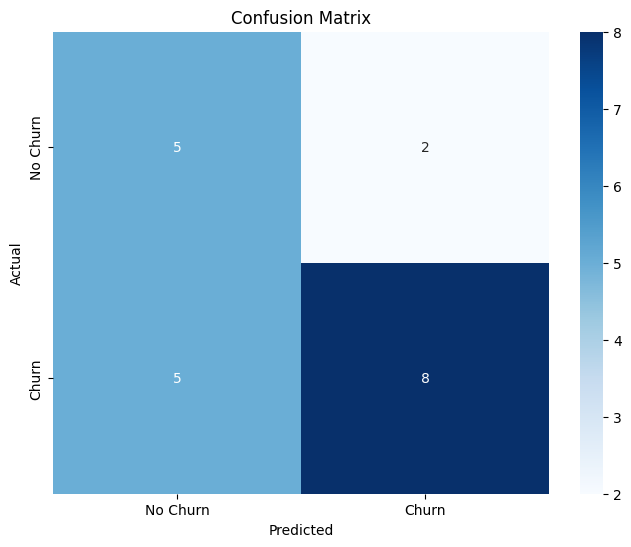

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Visualizing Feature Importance

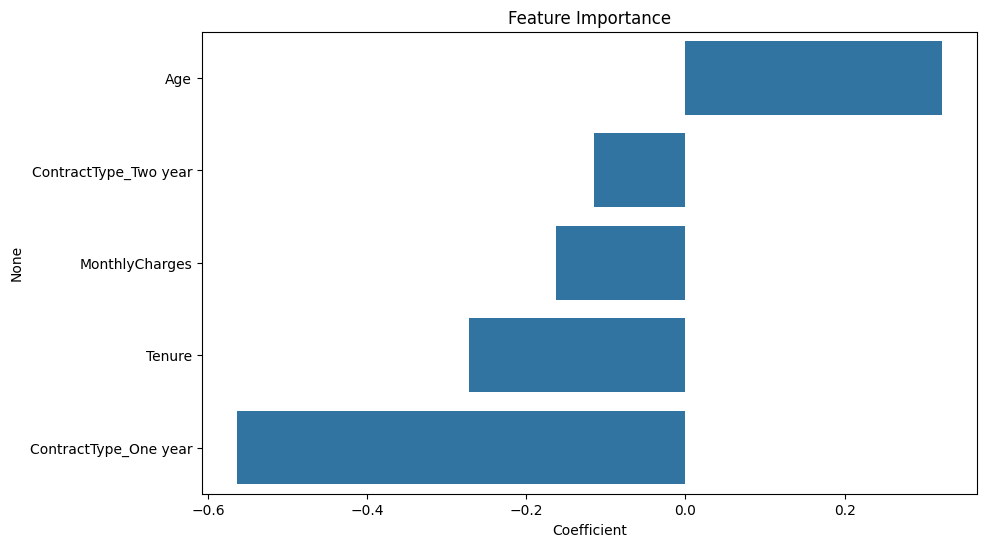

In [ ]:
coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.title('Feature Importance')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa09a8a7-e5ce-491c-83d3-526f85db1462' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>